In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [20]:
glass.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [21]:
glass['household'] = glass.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.household.value_counts()

0    163
1     51
Name: household, dtype: int64

In [22]:
glass.sort_values( by = 'Al', inplace=True)
X= np.array(glass.Al).reshape(-1,1)
y = glass.household

## Threshold = 0.2

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
# pred = logreg.predict(X)
pred_new_thresh = (logreg.predict_proba(X)[:,1] >=0.2).astype(int)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

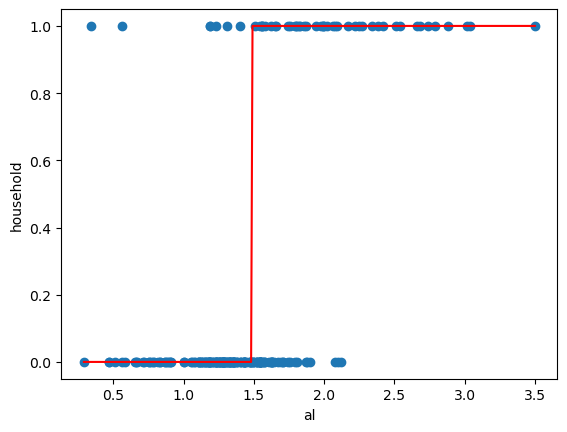

In [6]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred_new_thresh, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [7]:
logreg.predict_proba(X)[:15]

array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403],
       [0.98614074, 0.01385926],
       [0.98614074, 0.01385926],
       [0.98526292, 0.01473708],
       [0.9817376 , 0.0182624 ],
       [0.98117062, 0.01882938],
       [0.98058638, 0.01941362],
       [0.97806663, 0.02193337],
       [0.97738831, 0.02261169],
       [0.9752281 , 0.0247719 ],
       [0.9752281 , 0.0247719 ]])

In [8]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935956
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950845
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967657
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969552


Text(0, 0.5, 'household')

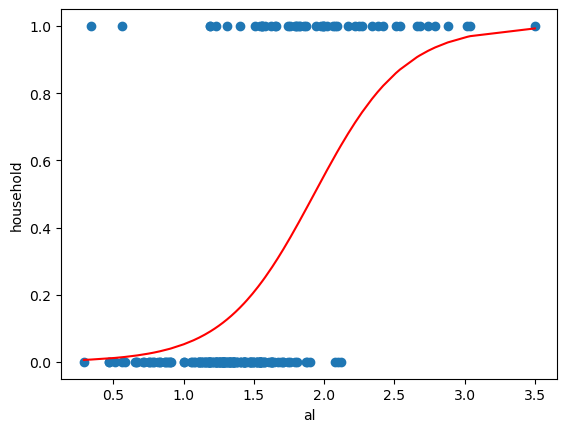

In [9]:
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [11]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred_new_thresh)
cm

array([[121,  42],
       [  7,  44]], dtype=int64)

In [12]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy


0.7710280373831776

In [13]:
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision

0.5116279069767442

In [14]:
Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall

0.8627450980392157

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred_new_thresh)

0.7710280373831776

In [17]:
precision_score(y_true=y, y_pred=pred_new_thresh)

0.5116279069767442

In [18]:
recall_score(y,pred_new_thresh)

0.8627450980392157

## Threshold = 0.8

In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
# pred = logreg.predict(X)
pred_new_thresh_08 = (logreg.predict_proba(X)[:,1] >=0.8).astype(int)
logreg.coef_, logreg.intercept_

(array([[3.11517927]]), array([-6.00934605]))

Text(0, 0.5, 'household')

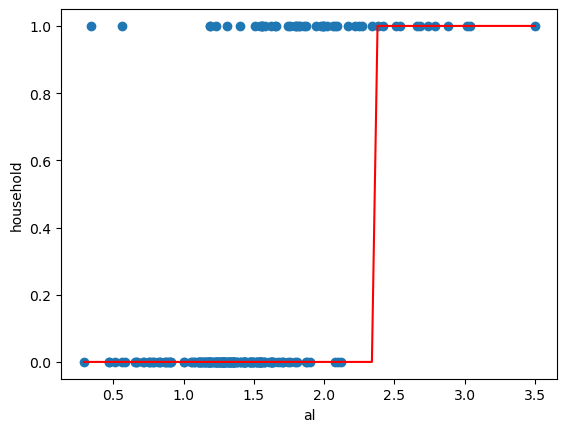

In [26]:
glass.sort_values( by = 'Al', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, pred_new_thresh_08, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [27]:
logreg.predict_proba(X)[:15]

array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403],
       [0.98614074, 0.01385926],
       [0.98614074, 0.01385926],
       [0.98526292, 0.01473708],
       [0.9817376 , 0.0182624 ],
       [0.98117062, 0.01882938],
       [0.98058638, 0.01941362],
       [0.97806663, 0.02193337],
       [0.97738831, 0.02261169],
       [0.9752281 , 0.0247719 ],
       [0.9752281 , 0.0247719 ]])

In [28]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1,0,0.006024
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,1,0.007032
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1,0,0.010506
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1,0,0.011884
...,...,...,...,...,...,...,...,...,...,...,...,...
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7,1,0.935956
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7,1,0.950845
172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5,1,0.967657
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,1,0.969552


Text(0, 0.5, 'household')

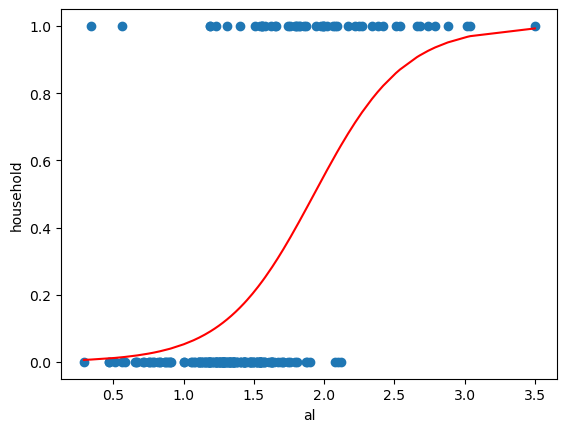

In [29]:
plt.scatter(glass.Al, glass.household)
plt.plot(glass.Al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [30]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred_new_thresh_08)
cm

array([[163,   0],
       [ 39,  12]], dtype=int64)

In [31]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy


0.8177570093457944

In [32]:
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision

1.0

In [33]:
Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall

0.23529411764705882

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred_new_thresh_08)

0.8177570093457944

In [35]:
precision_score(y_true=y, y_pred=pred_new_thresh_08)

1.0

In [36]:
recall_score(y,pred_new_thresh_08)

0.23529411764705882

## With Column Si

In [58]:
glass.sort_values( by = 'Si', inplace=True)
X= np.array(glass.Si).reshape(-1,1)
y = glass.household

## Threshold = 0.2385

In [74]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X,y)
# pred = logreg.predict(X)
pred_new_thresh = (logreg.predict_proba(X)[:,1] >=0.2385).astype(int)
print(pred_new_thresh)
logreg.coef_, logreg.intercept_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


(array([[-0.015938]]), array([-0.0002238]))

Text(0, 0.5, 'household')

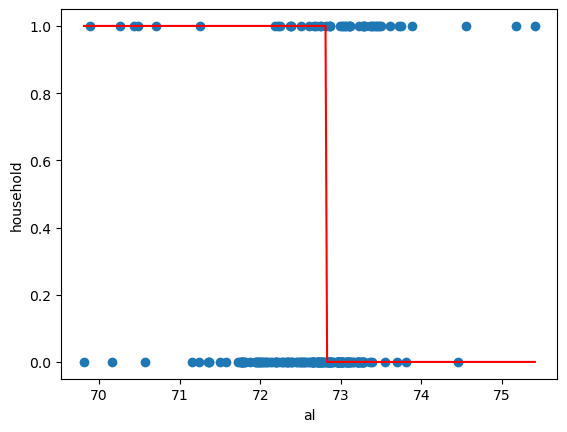

In [75]:
glass.sort_values( by = 'Si', inplace=True)
# Plot the class predictions.

plt.scatter(glass.Si, glass.household)
plt.plot(glass.Si, pred_new_thresh, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [76]:
logreg.predict_proba(X)[:15]

array([[0.75266106, 0.24733894],
       [0.75289835, 0.24710165],
       [0.75369807, 0.24630193],
       [0.75399382, 0.24600618],
       [0.75449604, 0.24550396],
       [0.75464362, 0.24535638],
       [0.75490912, 0.24509088],
       [0.75529227, 0.24470773],
       [0.75661543, 0.24338457],
       [0.75687948, 0.24312052],
       [0.75690881, 0.24309119],
       [0.75720194, 0.24279806],
       [0.75723124, 0.24276876],
       [0.75723124, 0.24276876],
       [0.7576412 , 0.2423588 ]])

In [77]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,household,household_pred_prob
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,0,0.247339
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,1,0.247102
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2,0,0.246302
188,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.00,0.00,7,1,0.246006
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7,1,0.245504
...,...,...,...,...,...,...,...,...,...,...,...,...
168,1.51666,12.86,0.00,1.83,73.88,0.97,10.17,0.00,0.00,5,1,0.235462
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00,2,0,0.233830
180,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.00,0.00,6,1,0.233545
201,1.51653,11.95,0.00,1.19,75.18,2.70,8.93,0.00,0.00,7,1,0.231752


Text(0, 0.5, 'household')

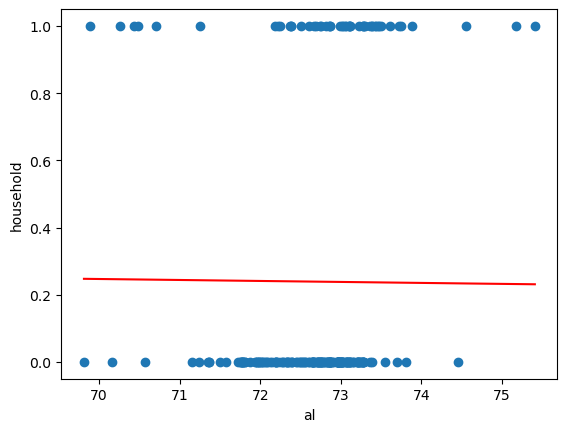

In [78]:
plt.scatter(glass.Si, glass.household)
plt.plot(glass.Si, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [79]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y, y_pred=pred_new_thresh)
cm

array([[72, 91],
       [32, 19]], dtype=int64)

In [80]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy


0.4252336448598131

In [81]:
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision

0.17272727272727273

In [82]:
Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall

0.37254901960784315

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y, y_pred=pred_new_thresh)

0.4252336448598131

In [84]:
precision_score(y_true=y, y_pred=pred_new_thresh)

0.17272727272727273

In [85]:
recall_score(y,pred_new_thresh)

0.37254901960784315

## Logistic Regression on whole data

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [129]:
glass.Type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

In [158]:
glass.shape

(214, 10)

In [134]:
cols_for_scale = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
glass_scale = glass[cols_for_scale]
glass_scale
scaler = StandardScaler()
glass_scaled = pd.DataFrame(scaler.fit_transform(glass_scale), columns=glass_scale.columns)
glass_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [135]:
glass_scaled_1 = pd.concat([glass_scaled, glass['Type']], axis=1)
glass_scaled_1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,7
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,7
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,7
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,7


In [142]:
glass_scaled_1['household'] = glass_scaled_1.Type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass_scaled_1.household.value_counts()

0    163
1     51
Name: household, dtype: int64

In [165]:
# glass.sort_values( by = 'Al', inplace=True)
X= glass_scaled_1[cols_for_scale]
y = glass_scaled_1['household']

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Threshold = 0.2

In [167]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
# pred = logreg.predict(X)
pred_new_thresh = (logreg.predict_proba(X_test)[:,1] >=0.2).astype(int)
print(pred_new_thresh)
logreg.coef_, logreg.intercept_

[0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 0 1 0]


(array([[ 0.54073217,  0.88328718, -1.50325978,  1.85053582,  0.87253523,
          0.38186744, -0.08307243,  0.31770848, -0.69299003]]),
 array([-1.89723406]))

In [173]:
pred_new_thresh.shape

(43,)

In [171]:
logreg.predict_proba(X_train)[:15]

array([[0.81080548, 0.18919452],
       [0.99844144, 0.00155856],
       [0.53993606, 0.46006394],
       [0.9176269 , 0.0823731 ],
       [0.94583414, 0.05416586],
       [0.76235832, 0.23764168],
       [0.99284061, 0.00715939],
       [0.99782209, 0.00217791],
       [0.97156509, 0.02843491],
       [0.99791078, 0.00208922],
       [0.93606174, 0.06393826],
       [0.960168  , 0.039832  ],
       [0.92703693, 0.07296307],
       [0.46232107, 0.53767893],
       [0.9968879 , 0.0031121 ]])

In [174]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_true=y_test, y_pred=pred_new_thresh)
cm

array([[26,  2],
       [ 0, 15]], dtype=int64)

In [175]:
Accuracy = (cm[0,0]+ cm[1,1])/ (np.sum(cm))
Accuracy


0.9534883720930233

In [176]:
Precision = (cm[1,1])/ (np.sum(cm[: , 1]))
Precision

0.8823529411764706

In [177]:
Recall = (cm[1,1])/ (np.sum(cm[1,:]))
Recall

1.0

In [178]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy_score(y_true=y_test, y_pred=pred_new_thresh)

0.9534883720930233

In [180]:
precision_score(y_true=y_test, y_pred=pred_new_thresh)

0.8823529411764706

In [183]:
recall_score(y_true=y_test, y_pred=pred_new_thresh)

1.0

0.9952380952380953


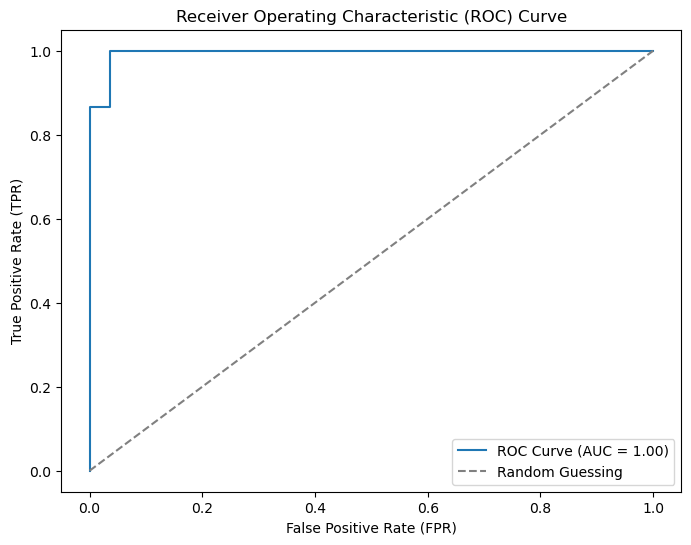

In [184]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = logreg.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
print(roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()